## Final Project Notebook

This notebook handles the cleaning and subsetting of my corpus, as well as the sentiment analysis for the various subcorpora and some graphing with the results.

Sentiment Analysis by Eli Gnesin  
*Edited November 17, 2020*  

In [2]:
#Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os
from langdetect import detect

In [2]:
#Read in the data as a DataFrame to look at
data = pd.read_csv("RBG ids.csv")

C:\Users\eli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Thu Sep 10 13:07:32 +0000 2020,NaN,NaN,https://twitter.com/alaynatreene/status/130404...,0,1304043833898999808,NaN,NaN,NaN,...,5771,6294,36,"White Plains, NY",stuart jones,gooner4evr,149808,NaN,NaN,False
1,NaN,Thu Sep 10 13:12:49 +0000 2020,NaN,NaN,NaN,0,1304045164378247170,NaN,NaN,NaN,...,8,61,0,NaN,Imam Iqbal,imam02111992,53,NaN,NaN,False
2,NaN,Thu Sep 10 13:17:25 +0000 2020,NaN,NaN,NaN,1,1304046322199207937,drisnya,1.304044e+18,87844934.0,...,8378,7432,72,South Carolina,david w. thompson,dwthompson1945,138093,NaN,NaN,False
3,NaN,Thu Sep 10 13:11:19 +0000 2020,NaN,NaN,NaN,0,1304044786190614529,NaN,NaN,NaN,...,498,1730,2,Long Island,John McGarry,coachjmcgarry,19948,NaN,NaN,False
4,NaN,Thu Sep 10 12:57:08 +0000 2020,NaN,NaN,NaN,0,1304041215294238720,NaN,NaN,NaN,...,49,459,0,NaN,Patti Mousseau,PMoose63,9733,NaN,NaN,False


In [4]:
data.shape

(3684687, 34)

In [5]:
data.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [13]:
# Load tweet texts and remove out non-"English" tweets
#This includes all tweets that "detect" does not read as English (Some emojis and links are also in this group)

textcol = 17
datafile = 'RBG ids.csv'

fulltweets, tweetdata = [], []

with open(datafile, 'r', encoding = 'UTF-8', errors = 'ignore') as infile:
    inreader = csv.reader(infile)
    header = next(inreader)  # skip header
    i = 0
    for row in inreader:
        i = i+1
        if i % 100000 == 0:
            print("tweet" + str(i))
        try:
            if detect(row[textcol]) == 'en':
                fulltweets.append(row)
                tweetdata.append(row[textcol])
        except:
            continue
        
nrtweets = len(tweetdata)

tweet100000
tweet200000
tweet300000
tweet400000
tweet500000
tweet600000
tweet700000
tweet800000
tweet900000
tweet1000000
tweet1100000
tweet1200000
tweet1300000
tweet1400000
tweet1500000
tweet1600000
tweet1700000
tweet1800000
tweet1900000
tweet2000000
tweet2100000
tweet2200000
tweet2300000
tweet2400000
tweet2500000
tweet2600000
tweet2700000
tweet2800000
tweet2900000
tweet3000000
tweet3100000
tweet3200000
tweet3300000
tweet3400000
tweet3500000
tweet3600000


In [4]:
#How Many tweets do we have?
len(tweetdata)

3515866

In [71]:
#Saving the fulltweet and tweetdata to CSV files

dictionary = {'text': tweetdata}
df = pd.DataFrame(dictionary)
df.to_csv('tweetdata.csv', index = False)
    
#with open('fulltweets.csv', 'w', errors='ignore', encoding = 'utf-8') as f2:
#    writer2 = csv.writer(f2)
#    writer2.writerow(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
#       'favorite_count', 'id', 'in_reply_to_screen_name',
#       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
#       'possibly_sensitive', 'retweet_count', 'retweet_id',
#       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
#       'user_screen_name', 'user_default_profile_image', 'user_description',
#       'user_favourites_count', 'user_followers_count', 'user_friends_count',
#       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
#       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'])
#    writer2.writerows(fulltweets)

In [3]:
tweetdata = pd.read_csv('tweetdata.csv')
tweetdata.shape

(3515866, 1)

In [39]:
#Making my subcorpora
before_tweets = [i[17] for i in fulltweets if int(i[1][8:10]) < 18]
after_tweets1 = [i[17] for i in fulltweets if int(i[1][8:10]) == 18]
after_tweets2 = [i[17] for i in fulltweets if int(i[1][8:10]) == 19]
after_tweets3 = [i[17] for i in fulltweets if int(i[1][8:10]) == 20]
after_tweets4 = [i[17] for i in fulltweets if int(i[1][8:10]) == 21]
after_tweets5 = [i[17] for i in fulltweets if int(i[1][8:10]) == 22]

jewishwords = ['jew', 'jews', 'jewish', 'judaism', 'kike', 'yid', 'zionist']
jewishtweets = [i[17] for i in fulltweets if any(x in jewishwords for x in i[17].lower().split())]
jewishtweets_comp = [i[17] for i in fulltweets if not any(x in jewishwords for x in i[17].lower().split())]

femalewords = ['female', 'woman','women', 'womxn', 'bitch', 'whore']
femaletweets = [i[17] for i in fulltweets if any(x in femalewords for x in i[17].lower().split())]
femaletweets_comp = [i[17] for i in fulltweets if not any(x in femalewords for x in i[17].lower().split())]

libwords = ['liberal', 'left', 'left-leaning', 'progressive']
libtweets = [i[17] for i in fulltweets if any(x in libwords for x in i[17].lower().split())]
libtweets_comp = [i[17] for i in fulltweets if not any(x in libwords for x in i[17].lower().split())]

In [40]:
#How long are the subcorpora we're looking at

print(len(before_tweets))
print(len(after_tweets1))
print(len(after_tweets2))
print(len(after_tweets3))
print(len(after_tweets4))
print(len(after_tweets5))
print(len(jewishtweets))
print(len(jewishtweets_comp))
print(len(femaletweets))
print(len(femaletweets_comp))
print(len(libtweets))
print(len(libtweets_comp))

9568
125128
2123737
660129
474365
122939
62121
3453745
188005
3327861
84941
3430925


In [5]:
#This is the sentiment lexicon code given in class

# Specify sentiment lexicon location
sentdictfile = 'Vader_lex.csv' 

sentiment_dict = {}

# Read data into dictionary
with open(sentdictfile, 'r') as dictfile:
    for row in csv.reader(dictfile):
        if len(row) >= 2:
            sentiment_dict[row[0]] = float(row[1])

nr_entries = len(sentiment_dict)
print('The Vader sentiment dictionary contains {} entries.'.format(nr_entries))

avg_valence = sum([x[1] for x in sentiment_dict.items()]) / nr_entries
print('The average valence is {:4.2f}.'.format(avg_valence))

The Vader sentiment dictionary contains 7506 entries.
The average valence is -0.18.


In [42]:
#This is the get sentiment code given in class

def get_sentiment(texts, sentiment_dict, aggregation='simple'):
    """Return a sentiment value for each text in texts.
    
    Aggregation options: 'simple' sum (positive words - negative words),
    or 'scaled' sum (simple sum / length of text).
    """
    valences = [None] * len(texts)
    for i in range(len(texts)):
        simple = 0
        wordlist = texts[i].split(' ')
        for j in wordlist:
            if j in sentiment_dict:
                simple += sentiment_dict[j]
        if aggregation == 'scaled':
            valences[i] = simple / len(wordlist)
        else:
            valences[i] = simple
    return valences

In [83]:
#This saved each subcorpus to a CSV and also ran the sentiment on each subcorpus

mylist = [before_tweets, after_tweets1, after_tweets2, after_tweets3,
         after_tweets4, after_tweets5, jewishtweets, femaletweets,
         libtweets]
mylist2 = ['before_tweets', 'after_tweets1', 'after_tweets2', 'after_tweets3',
         'after_tweets4', 'after_tweets5', 'jewishtweets', 'femaletweets',
         'libtweets']

for i in range(len(mylist)):
    file = mylist[i]
    name = mylist2[i]
    print(name)
    print(len(file))
    nrtexts = len(file)
    dictionary = {name: file}
    df = pd.DataFrame(dictionary)
    print(df.shape)
    df.to_csv('Subcorpora/'+ name +'.csv', index = False)
    textsentiments_simple = get_sentiment(file, sentiment_dict, aggregation='simple')
    textsentiments_scaled = get_sentiment(file, sentiment_dict, aggregation='scaled')
    # Display averages
    print('Average simple sentiment: {:5.3f}'.format(sum(textsentiments_simple)/nrtexts))
    print('Average scaled sentiment: {:5.3f}'.format(sum(textsentiments_scaled)/nrtexts))

before_tweets
9568
(9568, 1)
Average simple sentiment: 0.081
Average scaled sentiment: 0.004
after_tweets1
125128
(125128, 1)
Average simple sentiment: 0.244
Average scaled sentiment: 0.002
after_tweets2
2123737
(2123737, 1)
Average simple sentiment: 0.048
Average scaled sentiment: 0.000
after_tweets3
660129
(660129, 1)
Average simple sentiment: 0.081
Average scaled sentiment: 0.003
after_tweets4
474365
(474365, 1)
Average simple sentiment: 0.023
Average scaled sentiment: -0.001
after_tweets5
122939
(122939, 1)
Average simple sentiment: 0.026
Average scaled sentiment: -0.000
jewishtweets
62121
(62121, 1)
Average simple sentiment: -1.898
Average scaled sentiment: -0.076
femaletweets
188005
(188005, 1)
Average simple sentiment: -0.867
Average scaled sentiment: -0.043
libtweets
84941
(84941, 1)
Average simple sentiment: -0.402
Average scaled sentiment: -0.021


In [140]:
#Looking at the sentiment for the full corpus

with open('tweetdata.csv', encoding = 'UTF-8') as data:
    reader = csv.reader(data)
    text = list(reader)
    print('full corpus')
    print(len(text))
    print(text[1])
    nrtexts = len(text[1:])
    textsentiments_simple = mod_get_sentiment(text[1:], sentiment_dict, aggregation='simple')
    textsentiments_scaled = mod_get_sentiment(text[1:], sentiment_dict, aggregation='scaled')
    # Display averages
    print('Average simple sentiment: {:5.3f}'.format(sum(textsentiments_simple)/nrtexts))
    print('Average scaled sentiment: {:5.3f}'.format(sum(textsentiments_scaled)/nrtexts))

full corpus
3515867
["ICYMI with all the other stuff that happened yesterday, here's a reminder that Ted Cruz is on Trump's short list to replace RBG. \nVOTE! https://t.co/j1928QQocE"]
Average simple sentiment: 0.058
Average scaled sentiment: 0.001


[0.08112458193980128, 0.24426906847383792, 0.04849348106647752, 0.08142469123459349, 0.023332454966136576, 0.026446449051973964]


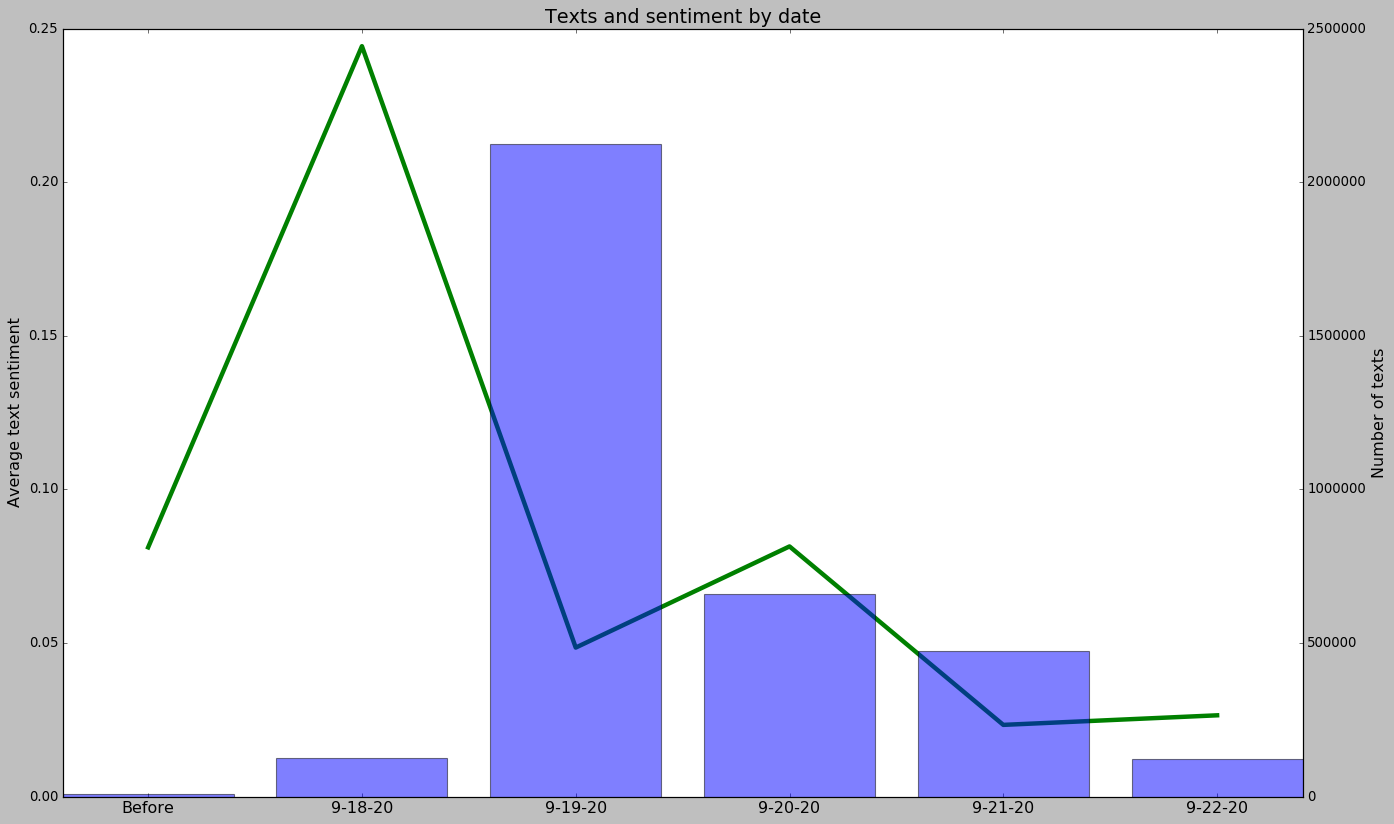

In [145]:
#Graphing sentiment and number of tweets by date

alldates = ['Before', '9-18-20', '9-19-20', '9-20-20', '9-21-20', '9-22-20']
datefiles = [before_tweets, after_tweets1, after_tweets2, after_tweets3, after_tweets4, after_tweets5]
datesentiments = [(sum(get_sentiment(i, sentiment_dict, aggregation='simple'))/len(i)) for i in datefiles]
print(datesentiments)

plt.style.use('classic')
plt.rcParams['figure.figsize']= (20,12)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alldates, datesentiments, c='green', linewidth=4)
ax2.bar(alldates, [len(datefiles[i]) for i in range(len(datefiles))], color='blue', alpha = 0.5)
ax2.grid(b=False)
ax1.set_title('Texts and sentiment by date', size = 'x-large')
ax1.set_xticklabels(alldates, rotation=0, size = 'large')
ax1.set_ylabel('Average text sentiment', size = 'large')
ax2.set_ylabel('Number of texts', size = 'large')
plt.show()

In [75]:
pd.read_csv('Subcorpora/before_tweets.csv').head()

,before_tweets
0,ICYMI with all the other stuff that happened y...
1,RT @war_noir: 2/\nAlso 40x46mm RBG-6 MGL makes...
2,@drisnya RBG's health has been precarious for ...
3,RT @eacisneros: Economical approach to voting:...
4,RT @DevinCow: If you aren’t voting for Biden b...


In [6]:
#This modifies the previous code because the CSV files have a list for each observation
#Therefore, we need to take the 0 index of the list, rather than the list itself

def mod_get_sentiment(texts, sentiment_dict, aggregation='simple'): #Modified for list issues
    """Return a sentiment value for each text in texts.
    
    Aggregation options: 'simple' sum (positive words - negative words),
    or 'scaled' sum (simple sum / length of text).
    """
    valences = [None] * len(texts)
    for i in range(len(texts)):
        simple = 0
        wordlist = texts[i][0].split(' ')
        for j in wordlist:
            if j in sentiment_dict:
                simple += sentiment_dict[j]
        if aggregation == 'scaled':
            valences[i] = simple / len(wordlist)
        else:
            valences[i] = simple
    return valences

group = []
sent = []
sents = []

for root, dirs, files in os.walk('Subcorpora'):
    for f in files:
        with open(os.path.join(root, f), encoding = 'UTF-8') as rf:
            reader = csv.reader(rf)
            text = list(reader)
            title = f[:-4]
            print(title)
            print(len(text))
            #print(text[1])
            textsentiments_simple = mod_get_sentiment(text[1:], sentiment_dict, aggregation='simple')
            textsentiments_scaled = mod_get_sentiment(text[1:], sentiment_dict, aggregation='scaled')
            # Display averages
            print('Average simple sentiment: {:5.3f}'.format(sum(textsentiments_simple)/len(text)))
            print('Average scaled sentiment: {:5.3f}'.format(sum(textsentiments_scaled)/len(text)))
            group.append(title)
            sent.append(sum(textsentiments_simple)/len(text))
            sents.append(sum(textsentiments_scaled)/len(text))

after_tweets1
125129
Average simple sentiment: 0.244
Average scaled sentiment: 0.002
after_tweets2
2123738
Average simple sentiment: 0.048
Average scaled sentiment: 0.000
after_tweets3
660130
Average simple sentiment: 0.081
Average scaled sentiment: 0.003
after_tweets4
474366
Average simple sentiment: 0.023
Average scaled sentiment: -0.001
after_tweets5
122940
Average simple sentiment: 0.026
Average scaled sentiment: -0.000
before_tweets
9569
Average simple sentiment: 0.081
Average scaled sentiment: 0.004
femaletweets
188006
Average simple sentiment: -0.867
Average scaled sentiment: -0.043
jewishtweets
62122
Average simple sentiment: -1.898
Average scaled sentiment: -0.076
libtweets
84942
Average simple sentiment: -0.402
Average scaled sentiment: -0.021
